In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2, os
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import shuffle

In [2]:
# Everything but the 'else' statement thanks to Charlie's direction toward Kaggle resources for error resolution
# Function to retrieve images from local directory
def load_images(directory):
    # List to store the image data
    images = []
    # List to store the corresponding image category
    categories = []
    # Dummy label to catch the uncategorized images
    label = 9
    
    # Label images from each of the categorized directories
    for category in os.listdir(directory):
        if category == 'buildings':
            label = 0
        elif category == 'forest':
            label = 1
        elif category == 'glacier':
            label = 2
        elif category == 'mountain':
            label = 3
        elif category == 'sea':
            label = 4
        elif category == 'street':
            label = 5
        # Pre-process each image from the 'pred' kaggle-test set 
        else:
            for jpg in os.listdir(directory):
                # Read image data with OpenCV
                img = cv2.imread(directory+jpg) 
                # Ensure each image is the same size
                img = cv2.resize(img,(150,150))
                images.append(img)
            return images
        # CREDIT 4 THIS 'FOR'loop: https://www.kaggle.com/uzairrj/beg-tut-intel-image-classification-93-76-accur
        # Pre-process each image in the training and validation sets
        for jpg in os.listdir(directory+category):
            # Read image data with OpenCV
            img = cv2.imread(directory+category+'/'+jpg)
            # Ensure each image is the same size
            img = cv2.resize(img,(150,150))
            images.append(img)
            categories.append(label)
    
    return shuffle(images,categories,random_state=86)

In [27]:
# Visualize accuracy scores of model after trained on data
def plot_loss(history, model_name):
    train_loss = history.history['loss'] 
    test_loss = history.history['val_loss'] 
    epoch_labels = history.epoch 
    # Set figure size
    plt.figure(figsize=(12, 8)) 
    # Generate line plot of training, testing loss over epochs
    plt.plot(train_loss, label='Training Loss', color='#185fad') 
    plt.plot(test_loss, label='Validation Loss', color='orange') 
    # Set title
    plt.title(f'Model: {model_name}\nTrain & Validation Loss by Epoch', fontsize=25) 
    plt.xlabel('Epoch', fontsize=18) 
    plt.ylabel('Categorical Crossentropy', fontsize=18) 
    plt.xticks(epoch_labels, epoch_labels)
    plt.legend(fontsize=18);

In [4]:
%pwd

'C:\\Users\\bgrif\\Desktop\\dsi\\projects\\4project-Intel-Image-Classification\\Intel-Image-Classification\\code'

In [5]:
# Prepare to load the image data
training_images_folder = '../../IMG/train/'
validation_images_folder = '../../IMG/test/'
kaggle_test_images_folder = '../../IMG/pred/'

# Load the image data into lists
img_train, cat_train = load_images(training_images_folder)
img_valid, cat_valid = load_images(validation_images_folder)
img_test_kaggle = load_images(kaggle_test_images_folder)

In [6]:
# CREDIT NOELLE LESSON 7p03 Regularizing-NN
# Setup Predictors: Input Features
X_train = np.array(img_train)
X_valid = np.array(img_valid)
X_test = np.array(img_test_kaggle)

# Normalize values for the neural network
# Generally: input values ~ neuron output values
max_value =255
X_train = X_train / max_value
X_valid = X_valid / max_value
X_test  = X_test  / max_value

# Setup Target: predicted image categories
y_train = np.array(cat_train)
y_valid = np.array(cat_valid)

# Unique Value Counts to verify balance of categories in train and validation data
unique_train, counts_train = np.unique(y_train, return_counts=True)
unique_valid, counts_valid = np.unique(y_valid, return_counts=True)
print(f'Normalized Unique Value Counts\n\nTraining Data:\n{np.asarray((unique_train, counts_train/y_train.shape)).T}')
print(f'\nValidation Data:\n{np.asarray((unique_valid, counts_valid/y_valid.shape)).T}')

# Multi-class target needs to be one-hot encoded
from tensorflow.keras import utils

# Categories (0, 5) need to be dummied for each of the six values
y_train = utils.to_categorical(y_train, num_classes = 6)
y_valid = utils.to_categorical(y_valid, num_classes = 6)

Normalized Unique Value Counts

Training Data:
[[0.         0.15612085]
 [1.         0.16182129]
 [2.         0.17129828]
 [3.         0.17899387]
 [4.         0.16203506]
 [5.         0.16973065]]

Validation Data:
[[0.         0.14566667]
 [1.         0.158     ]
 [2.         0.18433333]
 [3.         0.175     ]
 [4.         0.17      ]
 [5.         0.167     ]]


In [7]:
# Check that the shape of the data is as expected for Input: 150x150x3 images
print(f'Shape of X-Predictors: \n\tTrain {X_train.shape}\n\tValid  {X_valid.shape}\n\tTest   {X_test.shape}')
print()
print(f'Shape of y-Targets: \n\tTrain {y_train.shape}\n\tValid  {y_valid.shape}')

Shape of X-Predictors: 
	Train (14034, 150, 150, 3)
	Valid  (3000, 150, 150, 3)
	Test   (7301, 150, 150, 3)

Shape of y-Targets: 
	Train (14034, 6)
	Valid  (3000, 6)


In [68]:
# CREDIT DIRECT FROM NOTES LESSON 7p04 CNN
# Create fully-connected, FFNN
# Pro-Tip: Nodes per hidden layer = between (output-classes=6, input-features=150x150x3=67_500)

# Instantiate 
ffnn_model1 = Sequential() 

# Add "Flatten" layer to "align" neurons in vertical array 
# (Required before adding subsequent Dense layers) 
ffnn_model1.add(Flatten(input_shape=(150, 150, 3))) 

# Nodes per hidden layer TIP: Input #(67,500) & Output # (6) so number between (6-67,500) 
# - A 128-node hidden layer. --> discovered thru trial and error
ffnn_model1.add(Dense(128, 
               activation='relu')) 

# - A 32-node hidden layer. --> discovered thru trial and error
ffnn_model1.add(Dense(256, 
               activation='relu'))
# Add Dropout with 30% keeping prob to second hidden layer
ffnn_model2.add(Dropout(0.3))

# - A 32-node hidden layer. --> discovered thru trial and error
ffnn_model1.add(Dense(64, 
               activation='relu'))

# Add Dropout with 30% keeping prob to second hidden layer
ffnn_model2.add(Dropout(0.3))

# - A 32-node hidden layer. --> discovered thru trial and error
ffnn_model1.add(Dense(32, 
               activation='relu'))

# Add Dropout with 30% keeping prob to second hidden layer
ffnn_model2.add(Dropout(0.3))

# - The appropriate output layer --> we know from No. of target-class possibilities (ex. 0-5, so 6)
ffnn_model1.add(Dense(6, 
               activation='softmax')) #Output layer: Softmax activation for multi-class targets

# Compile model
ffnn_model1.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy']) # accuracy is easier to interpret, so maybe later consider loss for results

ffnn_model1.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_22 (Flatten)         (None, 67500)             0         
_________________________________________________________________
dense_75 (Dense)             (None, 128)               8640128   
_________________________________________________________________
dense_76 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_77 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_78 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_79 (Dense)             (None, 6)                 198       
Total params: 8,691,878
Trainable params: 8,691,878
Non-trainable params: 0
___________________________________________

In [69]:
# Fit model on training data. 
history1 = ffnn_model1.fit(X_train, 
                    y_train,  
                    batch_size=256, # Increase batch size to fit faster
                    validation_data=(X_valid, y_valid), 
                    epochs=50, 
                    verbose=1);

Epoch 1/50
55/55 [==============================] - 15s 271ms/step - loss: 3.6872 - accuracy: 0.2376 - val_loss: 1.5631 - val_accuracy: 0.4223
Epoch 2/50
55/55 [==============================] - 4s 79ms/step - loss: 1.4530 - accuracy: 0.4394 - val_loss: 1.3929 - val_accuracy: 0.4817
Epoch 3/50
55/55 [==============================] - 4s 77ms/step - loss: 1.3869 - accuracy: 0.4659 - val_loss: 1.3625 - val_accuracy: 0.4833
Epoch 4/50
55/55 [==============================] - 4s 78ms/step - loss: 1.3044 - accuracy: 0.5006 - val_loss: 1.3175 - val_accuracy: 0.5010
Epoch 5/50
55/55 [==============================] - 4s 75ms/step - loss: 1.2596 - accuracy: 0.5257 - val_loss: 1.2896 - val_accuracy: 0.5207
Epoch 6/50
55/55 [==============================] - 4s 78ms/step - loss: 1.2111 - accuracy: 0.5403 - val_loss: 1.2572 - val_accuracy: 0.5237
Epoch 7/50
55/55 [==============================] - 4s 76ms/step - loss: 1.1950 - accuracy: 0.5512 - val_loss: 1.2625 - val_accuracy: 0.5370
Epoch 8/50


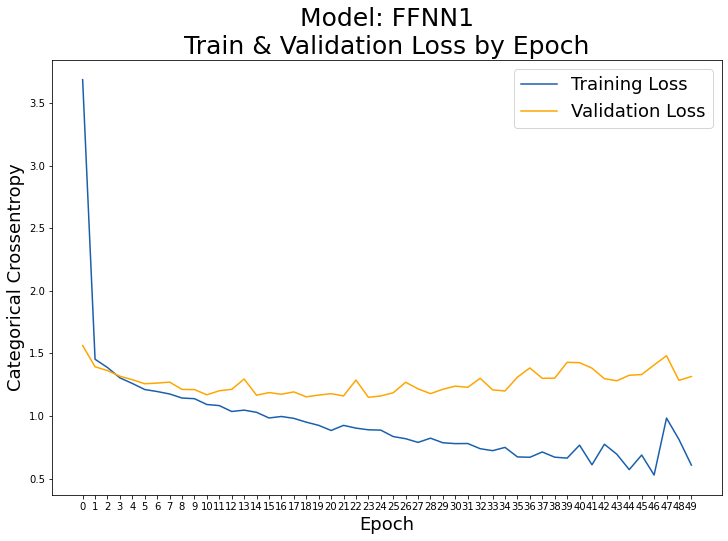

In [71]:
# CREDIT DIRECT FROM NOTES LESSON 7p04 CNN
plot_loss(history1, 'FFNN1')

In [76]:
# CREDIT: DIRECT FROM GA NOTES, DAN- LESSON 7p04 CNN
# Create fully-connected, FFNN
# Pro-Tip: Nodes per hidden layer = between (output-classes=6, input-features=150x150x3=67_500)

# Instantiate 
ffnn_model2 = Sequential() 

# Add "Flatten" layer to "align" neurons in vertical array 
# (Required before adding subsequent Dense layers) 
ffnn_model2.add(Flatten(input_shape=(150, 150, 3))) 

# Nodes per hidden layer TIP: Input #(67,500) & Output # (6) so number between (6-67,500) 
# - A 256-node hidden layer. --> discovered thru trial and error
ffnn_model2.add(Dense(128, 
               activation='relu'))

# - Add 128-node hidden layer
ffnn_model2.add(Dense(128, 
               activation='relu'))

# - Add 64-node hidden layer
ffnn_model2.add(Dense(64, 
               activation='relu'))

# Add Dropout with 30% keeping prob to second hidden layer
ffnn_model2.add(Dropout(0.3))

# - Add 32-node hidden layer
ffnn_model2.add(Dense(32, 
               activation='relu'))

# Add Dropout with 30% keeping prob to second hidden layer
ffnn_model2.add(Dropout(0.3))

# - The appropriate output layer --> we know from No. of target-class possibilities (ex. 0-5, so 6)
ffnn_model2.add(Dense(6, 
               activation='softmax')) #Output layer: Softmax activation for multi-class targets

# Compile model
ffnn_model2.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy']) # accuracy is easier to interpret, so maybe later consider loss for results

# early stopping
es = EarlyStopping(patience = 10)

ffnn_model2.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_25 (Flatten)         (None, 67500)             0         
_________________________________________________________________
dense_90 (Dense)             (None, 128)               8640128   
_________________________________________________________________
dense_91 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_92 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_28 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_93 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_29 (Dropout)         (None, 32)              

In [77]:
# Fit model on training data. 
history2 = ffnn_model2.fit(X_train, 
                    y_train,  
                    batch_size=256, # Increase batch size to fit faster
                    validation_data=(X_valid, y_valid), 
                    epochs=100,
                    callbacks = [es],
                    verbose=1);

Epoch 1/100
55/55 [==============================] - 15s 267ms/step - loss: 2.5819 - accuracy: 0.2132 - val_loss: 1.6839 - val_accuracy: 0.3330
Epoch 2/100
55/55 [==============================] - 4s 77ms/step - loss: 1.7100 - accuracy: 0.2643 - val_loss: 1.5474 - val_accuracy: 0.4340
Epoch 3/100
55/55 [==============================] - 4s 76ms/step - loss: 1.6403 - accuracy: 0.3130 - val_loss: 1.5437 - val_accuracy: 0.3543
Epoch 4/100
55/55 [==============================] - 4s 77ms/step - loss: 1.5950 - accuracy: 0.3349 - val_loss: 1.4473 - val_accuracy: 0.4820
Epoch 5/100
55/55 [==============================] - 4s 77ms/step - loss: 1.5629 - accuracy: 0.3537 - val_loss: 1.5239 - val_accuracy: 0.4200
Epoch 6/100
55/55 [==============================] - 4s 77ms/step - loss: 1.5220 - accuracy: 0.3773 - val_loss: 1.3718 - val_accuracy: 0.4707
Epoch 7/100
55/55 [==============================] - 4s 78ms/step - loss: 1.5099 - accuracy: 0.3856 - val_loss: 1.3971 - val_accuracy: 0.4797
Epoc

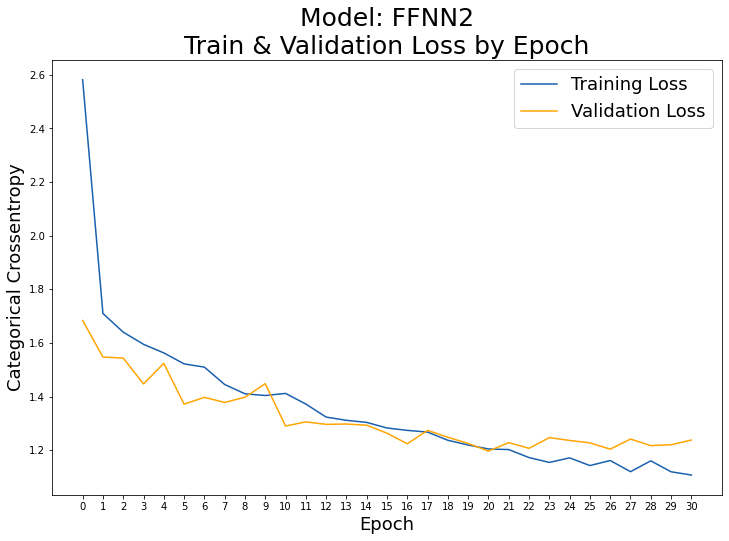

In [78]:
# CREDIT: DIRECT FROM GA NOTES, DAN- LESSON 7p04 CNN
# Here it looks like the Validation Loss has reached a minimum and is growing again
plot_loss(history2, 'FFNN2')

#### Code from General Assembly Lessons notes

In [ ]:
# CREDIT: DIRECT FROM GA NOTES, DAN- LESSON 7p04 CNN
# Instantiate a CNN
cnn_model = Sequential()

# Add a convolutional layer
cnn_model.add(Conv2D(filters=128,
                       kernel_size=(3,3),
                       activation='relu',
                       input_shape=(150,150,3)))

# Add a pooling layer
cnn_model.add(MaxPooling2D(pool_size=(2,2))) # dimensions of region of pooling

# Add another convolutional layer
cnn_model.add(Conv2D(256, 
                       kernel_size=(3,3), 
                       activation='relu'))

# Add another pooling layer
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

# We have to remember to flatten to go from the "box" to the vertical line of nodes! 
cnn_model.add(Flatten())

# Add a densely-connected layer with 64 neurons
cnn_model.add(Dense(256, activation='relu')) 

# Add a densely-connected layer with 64 neurons
cnn_model.add(Dense(64, activation='relu')) 

# Let's try to avoid overfitting! 
cnn_model.add(Dropout(0.3))

# Add a densely-connected layer with 32 neurons
cnn_model.add(Dense(32, activation='relu'))

# Let's try to avoid overfitting! 
cnn_model.add(Dropout(0.3))

# Add a final layer with 10 neurons. 
cnn_model.add(Dense(6, activation='softmax'))

# Compile model 
cnn_model.compile(loss='categorical_crossentropy', 
                    optimizer='adam', 
                    metrics=['accuracy'])

# early stopping
es = EarlyStopping(patience = 10)

# Fit model on training data 
history_cnn = cnn_model.fit(X_train, 
                          y_train, 
                          batch_size=128, 
                          validation_data=(X_valid, y_valid), 
                          epochs=2,
                          callbacks = [es],
                          verbose=1)

Epoch 1/100
110/110 [==============================] - 740s 7s/step - loss: 1.5196 - accuracy: 0.4263 - val_loss: 1.0201 - val_accuracy: 0.6227
Epoch 2/100
110/110 [==============================] - ETA: 0s - loss: 0.9957 - accuracy: 0.6278

In [ ]:
# CREDIT: DIRECT FROM GA NOTES, DAN- LESSON 7p04 CNN
# Here it looks like the Validation Loss has reached a minimum and is growing again
plot_loss(history_cnn, 'CNN')